In [1]:
# Load the Pandas library to read experimental data from the Marionette paper [1]
import pandas as pd
# Import pacti PolyhedralContract class to read contracts
from pacti.terms.polyhedra import PolyhedralContract
from pacti.iocontract.iocontract import Var
from synbio_functions import create_sensor_contracts
from load_data import load_data
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Import Python numpy
import numpy as np
import re

In [2]:
# Read the data from the paper using the CSV file "marionette_data.csv"
df = pd.read_csv("data/marionette_data_with_std.csv", delimiter=",", engine="python")

# Add the new "std" column with random values between 0.1 and 0.3
df['std'] = np.random.uniform(0.7, 0.8, len(df))

# Write the updated DataFrame to a new CSV file
df.to_csv('data/marionette_data_with_std.csv', index=False)
# Load Eric data
all_absolute_data = load_data("absolute")
all_normalized_data = load_data("normalized")
# Create all sensor contracts:
sensor_names = [str(i) for i in df["Inducer"]]
sensor_library = {}
sensor_library_params = {}
for sensor in sensor_names:
    sensor_params = {}
    yleak_s = df.loc[df["Inducer"] == sensor]["ymin (RPUx10-3)"].values[0]
    yleak_s = yleak_s * 1e-3
    s_start = df.loc[df["Inducer"] == sensor]["start"].values[0]
    s_K = df.loc[df["Inducer"] == sensor]["K (µM)"].values[0]
    ymax_s = df.loc[df["Inducer"] == sensor]["ymax Linear"].values[0]
    ymax_sat = df.loc[df["Inducer"] == sensor]["ymax (RPU)"].values[0]
    std = df.loc[df["Inducer"] == sensor]["std"].values[0]
    sexp_start = s_start
    sexp_K = 100*s_K
    if sensor in all_normalized_data:
        curr_data = all_normalized_data[sensor]
        # Extract numerical part from column names and convert them to integers
        column_numbers = [float(re.match(r'(\d+\.?\d*)', col).group()) for col in curr_data.columns if re.match(r'(\d+\.?\d*)', col)]
        sorted_column_numbers = sorted(column_numbers)
        sexp_K = max(column_numbers)
        sexp_start = min(column_numbers)
        sexp_start = sorted_column_numbers[1]
        s_K = sorted_column_numbers[2]
    # if sensor == "Sal":
    #     s_start = 25*s_start
    #     K = 8*s_K
#         sexp_K = 40*s_K
    if sensor == "aTc":
        s_start = 4*s_start
        sexp_K = 100*s_K
        s_K = s_K
    if sensor == "OHC14":
        s_K = s_K
    sensor_params = {"leak": yleak_s, "start": s_start,
                     "K": s_K, "ymax": ymax_s, "std":std, "ymax_sat":ymax_sat, 
                     "exp_start":sexp_start, "exp_K":sexp_K}
    s_output = "dCas9"
    contract_s_0, contract_s_lin, contract_s_max = create_sensor_contracts(
        sensor_input=sensor, output="xRFP", start=s_start, K=s_K,
        ymax_lin=ymax_s, yleak=yleak_s, std=std, ymax_sat = ymax_sat, final_K = sexp_K,
    )
    sensor_library[sensor] = [contract_s_0, contract_s_lin, contract_s_max]
    sensor_library_params[sensor] = sensor_params

# Create available sensor contracts:

contract_aTc_off, contract_aTc_lin, contract_aTc_sat = create_sensor_contracts(
    sensor_input="aTc", output="dCas9", start=sensor_library_params["aTc"]["start"],
    K=sensor_library_params["aTc"]["K"],
    ymax_lin=sensor_library_params["aTc"]["ymax"], yleak=sensor_library_params["aTc"]["leak"],
    ymax_sat=sensor_library_params["aTc"]["ymax_sat"],
    std=sensor_library_params["aTc"]["std"], final_K = sensor_library_params["aTc"]["exp_K"],
)
sensor_library["aTc"] = [contract_aTc_off, contract_aTc_lin, contract_aTc_sat]

contract_Sal_off, contract_Sal_lin, contract_Sal_sat = create_sensor_contracts(
    sensor_input="Sal", output="xRFP", start=sensor_library_params["Sal"]["start"],
    K=sensor_library_params["Sal"]["K"],
    ymax_lin=sensor_library_params["Sal"]["ymax"], yleak=sensor_library_params["Sal"]["leak"],
    ymax_sat=sensor_library_params["Sal"]["ymax_sat"],
    std=sensor_library_params["Sal"]["std"], final_K = sensor_library_params["Sal"]["exp_K"],
)
sensor_library["Sal"] = [contract_Sal_off, contract_Sal_lin, contract_Sal_sat]

contract_OC6_off, contract_OC6_lin, contract_OC6_sat = create_sensor_contracts(
    sensor_input="OC6", output="xRFP", start=sensor_library_params["OC6"]["start"],
    K=sensor_library_params["OC6"]["K"],
    ymax_lin=sensor_library_params["OC6"]["ymax"], yleak=sensor_library_params["OC6"]["leak"],
    ymax_sat=sensor_library_params["OC6"]["ymax_sat"],
    std=sensor_library_params["OC6"]["std"], final_K = sensor_library_params["OC6"]["exp_K"],
)
sensor_library["OC6"] = [contract_OC6_off, contract_OC6_lin, contract_OC6_sat]

contract_OHC14_off, contract_OHC14_lin, contract_OHC14_sat = create_sensor_contracts(
    sensor_input="OHC14", output="xRFP", start=sensor_library_params["OHC14"]["start"],
    K=sensor_library_params["OHC14"]["K"],
    ymax_lin=sensor_library_params["OHC14"]["ymax"], yleak=sensor_library_params["OHC14"]["leak"],
    ymax_sat=sensor_library_params["OHC14"]["ymax_sat"],
    std=sensor_library_params["OHC14"]["std"], final_K = sensor_library_params["OHC14"]["exp_K"],
)
sensor_library["OHC14"] = [contract_OHC14_off, contract_OHC14_lin, contract_OHC14_sat]

contract_IPTG_off, contract_IPTG_lin, contract_IPTG_sat = create_sensor_contracts(
    sensor_input="IPTG", output="xRFP", start=sensor_library_params["IPTG"]["start"],
    K=sensor_library_params["IPTG"]["K"],
    ymax_lin=sensor_library_params["IPTG"]["ymax"], yleak=sensor_library_params["IPTG"]["leak"],
    ymax_sat=sensor_library_params["IPTG"]["ymax_sat"],
    std=sensor_library_params["IPTG"]["std"], final_K = sensor_library_params["IPTG"]["exp_K"],
)
sensor_library["IPTG"] = [contract_IPTG_off, contract_IPTG_lin, contract_IPTG_sat]

In [3]:
# From computed quotient (see specification_based_synthetic_biology notebook)
dCas9_inactive_new = PolyhedralContract.from_string(
    input_vars=["dCas9", "xRFP"],
    output_vars=["RFP"],
    assumptions=[
      "dCas9 <= 0.008233",
      "-dCas9 <= -0.0002917",
      "xRFP <= 0.007184",
      "-xRFP <= -0.0002805",
    ],
    guarantees=[
      "-RFP - 10.84 dCas9 - 7182 xRFP <= -3212", 
      "RFP + 8699e-2 dCas9 + 9450 xRFP <= 5026",
      "-RFP <= -0"]
)

dCas9_active_new = PolyhedralContract.from_string(
    input_vars=["dCas9", "xRFP"],
    output_vars=["RFP"],
    assumptions=[
      "dCas9 <= 2.268",
      "-dCas9 <= -0.2064",
      "xRFP <= 2.896",
      "-xRFP <= -0.2676",
    ],
    guarantees=[
      "-RFP - 0.009218 dCas9 - 460.1 xRFP <= -1418", # RFP >= 3878 - a - b
      "RFP + 17.399e+01 dCas9 + 155.6401 xRFP <= 601",  # 3878 - a - b <= RFP <= 1250 - a - b
      "-RFP <= -0"]
)
# Can decrease +RHS and can increase corresponding coefficients
# Can increase -RHS and can decrease corresponding coefficients

In [4]:
dCas9_inactive_new.get_variable_bounds("RFP")

(3160.3152662800003, 5023.323900017)

In [5]:

RFP_positive =  PolyhedralContract.from_string(
        input_vars=[],
        output_vars=["RFP"],
        assumptions=[],
        guarantees=["-RFP <= -0"]
      )
top_level_off_OC6 = sensor_library["OC6"][0].compose(contract_aTc_off).compose(dCas9_inactive_new).merge(RFP_positive)

at_input_values = {
    Var("OC6"):sensor_library_params["OC6"]["exp_start"],
    Var("aTc"):sensor_library_params["aTc"]["start"]
}
evaluated_guarantees = top_level_off_OC6.g.evaluate(at_input_values)
rfp_on = evaluated_guarantees.optimize(objective = {Var("RFP"): 1}, maximize = True)
print(evaluated_guarantees)

top_level_on_OC6 = sensor_library["OC6"][2].compose(contract_aTc_sat).compose(dCas9_active_new)
at_input_values = {
    Var("OC6"):sensor_library_params["OC6"]["exp_K"],
    Var("aTc"):sensor_library_params["aTc"]["exp_K"]
}
evaluated_guarantees = top_level_on_OC6.g.evaluate(at_input_values)
print(evaluated_guarantees)
rfp_off = evaluated_guarantees.optimize(objective = {Var("RFP"): 1}, maximize = True)
print("fold-change = ", rfp_on/rfp_off)

[
  -RFP <= 1.184e+04
  RFP <= 2647
]
[
  -RFP <= -349.9
  RFP <= 447.7
]
fold-change =  5.913290145087293


In [6]:
top_level_off_OC6

<Var InVars: [OC6, aTc]
OutVars:[RFP]
A: [
  1.156 aTc <= 0.008205
  -0.1753 aTc <= -0.0001067
  -0.2516 OC6 <= -0.0001873
  OC6 <= 0.002
]
G: [
  -1.506e+04 OC6 - RFP - 12.53 aTc <= -3212
  2378 OC6 + RFP + 15.25 aTc <= 5025
]>

In [7]:
top_level_off_OHC14 = sensor_library["OHC14"][0].compose(contract_aTc_off).compose(dCas9_inactive_new)
at_input_values = {
    Var("OHC14"):sensor_library_params["OHC14"]["exp_start"],
    Var("aTc"):sensor_library_params["aTc"]["start"]
}
evaluated_guarantees = top_level_off_OHC14.g.evaluate(at_input_values)
rfp_on = evaluated_guarantees.optimize(objective = {Var("RFP"): 1}, maximize = True)
print(evaluated_guarantees)

top_level_on_OHC14 = sensor_library["OHC14"][2].compose(contract_aTc_sat).compose(dCas9_active_new)
at_input_values = {
    Var("OHC14"):sensor_library_params["OHC14"]["exp_K"],
    Var("aTc"):sensor_library_params["aTc"]["exp_K"]
}
evaluated_guarantees = top_level_on_OHC14.g.evaluate(at_input_values)
print(evaluated_guarantees)
rfp_off = evaluated_guarantees.optimize(objective = {Var("RFP"): 1}, maximize = True)
print("fold-change = ", rfp_on/rfp_off)

[
  -RFP <= -3094
  RFP <= 5006
]
[
  -RFP <= -185.2
  RFP <= 441.1
]
fold-change =  11.348624272652156


In [8]:
# For a dCas9 mechanism that works, choose sensor that gives highest fold change
input2 = "aTc"
in2_params = sensor_library_params["aTc"]
# Now we will go through all other sensors and
# find out which are OK to use given the context
sensor_ok = {}
# We will store all sensor names that are not compatible in a dictionary:
design_error = {}
# We will store the fold-change for all the
fold_change = {}
on_values = {}
off_values = {}
max_on_values = {}
max_off_values = {}
min_on_values = {}
min_off_values = {}
# Desired fold change: RFP_on/RFP_off
desired_fold_change = 3
# Go through all sensors in the library except aTc,
# since that has been chosen for the 2nd subsystem
error_log = []
for sensor in sensor_library:
    if sensor == "aTc":
        continue
#     print("trying ", sensor)
    in1_params = sensor_library_params[sensor]
    # OFF condition
    # (note that RFP will be ON for this, so we will calculate "rfp_vals_on")
    c_sensor1 = sensor_library[sensor][0]
    c_sensor2 = contract_aTc_off
    # Compose the sensors together
    # (if allowed! => Handle exceptions of the Pacti
    # design error if composition is not allowed)
    try:
        sensor_comp = c_sensor2.compose(c_sensor1)
        top_level_off_i = sensor_comp.compose(dCas9_inactive_new)
    except Exception as e:
        # If Pacti raises a ValueError saying that the composition was
        # "unsatisfiable in context", then that
        # means that this sensor will not work!
        if "unsatisfiable in context" in str(e):
            design_error[sensor] = False
            error_log.append(e)
        else:
            raise(e)
    else:
        design_error[sensor] = True
    # If the try block succeeds, this block runs
        at_input_values = {
            Var(sensor):in1_params["exp_start"],
            Var(input2):in2_params["start"]
        }
        values = []
#         for term in top_level_off_i.g.evaluate(at_input_values).to_str_list():
#             values.append(np.abs(float(sympy.sympify(term).rhs)))
#         rfp_on = np.max(np.array(values))
        rfp_vals_on = {}
        rfp_vals_on_min = {}
# #         print("RFP on value for {0} is {1}".format(sensor, rfp_on))
        evaluated_guarantees = top_level_off_i.g.evaluate(at_input_values)
        rfp_on = evaluated_guarantees.optimize(objective = {Var("RFP"): 1}, maximize = True)
        rfp_vals_on[in1_params["start"], in2_params["start"]] = rfp_on
        
        rfp_on_min = evaluated_guarantees.optimize(objective = {Var("RFP"): 1}, maximize = False)
        # rfp_on_min must be positive
        rfp_vals_on_min[in1_params["start"], in2_params["start"]] = rfp_on_min

        # ON condition
        # (note that RFP will be OFF for this, so we will calculate "rfp_vals_off")
        c_sensor1 = sensor_library[sensor][2]
        c_sensor2 = contract_aTc_sat
        # Compose the sensors together
        # (if allowed! => Handle exceptions of the Pacti
        # design error if composition is not allowed)
        try:
            sensor_comp = c_sensor2.compose(c_sensor1)
            top_level_sat_i = sensor_comp.compose(dCas9_active_new)
        except Exception as e:
            # If Pacti raises a ValueError saying that the composition was
            # "unsatisfiable in context", then that means
            # that this sensor will not work!
#             if "unsatisfiable in context" in str(e):
            design_error[sensor] = False
            error_log.append(e)
#             else:
#                 raise(e)
        else:
            design_error[sensor] = True
            # If the try block succeeds, this block runs
            at_input_values = {Var(sensor):in1_params["exp_K"], 
                               Var(input2):in2_params["exp_K"]}
            values = []
#             for term in top_level_sat_i.g.evaluate(at_input_values).to_str_list():
#                 values.append(np.abs(float(sympy.sympify(term).rhs)))
#             rfp_off = np.min(np.array(values))
            rfp_vals_off = {}
            rfp_vals_off_min = {}
            evaluated_guarantees = top_level_sat_i.g.evaluate(at_input_values)
            rfp_off = evaluated_guarantees.optimize(objective = {Var("RFP"): 1}, maximize = True)
            rfp_vals_off[in1_params["exp_K"], in2_params["exp_K"]] = rfp_off
            rfp_off_min = evaluated_guarantees.optimize(objective = {Var("RFP"): 1}, maximize = False)
            rfp_vals_off_min[in1_params["exp_K"], in2_params["exp_K"]] = rfp_off_min
    # Now that we have rfp_vals_on and rfp_vals_off,
    # we can compute the fold change:
    if design_error[sensor]:
        RFP_on_max = list(rfp_vals_on.values())[0]
        RFP_off_max = list(rfp_vals_off.values())[0]
        RFP_on_min = list(rfp_vals_on_min.values())[0]
        RFP_off_min = list(rfp_vals_off_min.values())[0]
        on_values[sensor] = RFP_on_max
        max_on_values[sensor] = RFP_on_max
        min_on_values[sensor] = RFP_on_min
        off_values[sensor] = RFP_off_max
        max_off_values[sensor] = RFP_off_max
        min_off_values[sensor] = RFP_off_min
        fold_change[sensor] = float(RFP_on_max) / float(RFP_off_max)
        if fold_change[sensor] > desired_fold_change:
            sensor_ok[sensor] = True
        else:
            sensor_ok[sensor] = False
print("Found a total of {0} successful sensor choices: {1}\n".format(len(sensor_ok), sensor_ok.keys()))
print(fold_change)

Found a total of 7 successful sensor choices: dict_keys(['OC6', 'IPTG', 'Ara', 'Cho', 'DHBA', 'Sal', 'OHC14'])

{'OC6': 5.913290145087293, 'IPTG': 11.86891402371312, 'Ara': 11.175650775914368, 'Cho': 13.470122942237758, 'DHBA': 11.611656928382391, 'Sal': 12.591260787710262, 'OHC14': 11.348624272652156}


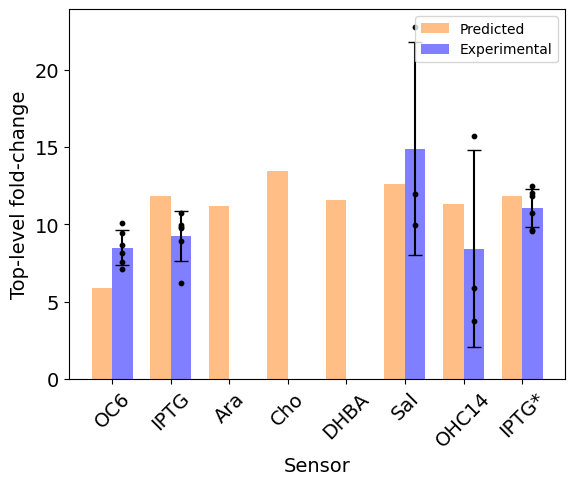

In [9]:
fig, ax = plt.subplots()
bar_width = 0.35
exp_fold_change = {}
fold_change["IPTG*"] = fold_change["IPTG"]
# Bar plots for predicted values
for i, key in enumerate(fold_change.keys()):
    if key in ["OHC14", "Sal", "IPTG*"]:
        exp_fold_change[key] = all_normalized_data[key].loc["mean"][0]
    if key in ["OC6", "IPTG"]:
        exp_fold_change[key] = all_normalized_data[key].loc["mean"][-1]
    ax.bar(i - bar_width / 2, fold_change[key], bar_width,
           color="C1", alpha=0.5, label="Predicted" if i == 0 else "")

# Bar plots for experimental values with error bars
experimental_keys = ["OHC14", "Sal", "IPTG", "IPTG*", "OC6"]
experimental_errors = [
    all_normalized_data["OHC14"].loc["std"][0],
    all_normalized_data["Sal"].loc["std"][0],
    all_normalized_data["IPTG"].loc["std"][-1],
    all_normalized_data["IPTG*"].loc["std"][0],
    all_normalized_data["OC6"].loc["std"][-1]
]
for i, key in enumerate(experimental_keys):
    index = list(fold_change.keys()).index(key) if key in fold_change else i + len(fold_change.keys())
    value = exp_fold_change[key] if key not in ["IPTG", "OC6"] else exp_fold_change[key]
    ax.bar(index + bar_width / 2, value, bar_width, color="blue", alpha=0.5, yerr=experimental_errors[i], capsize=5, label="Experimental" if i == 0 else "")

# Scatter plots for individual replicates
for i, key in enumerate(experimental_keys):
    index = list(fold_change.keys()).index(key) if key in fold_change else i + len(fold_change.keys())
    column_index = 0 if key not in ["IPTG", "OC6"] else -1
    y_values = [all_normalized_data[key].loc[replicate][column_index] for replicate in all_normalized_data[key].index if replicate not in ["mean", "std"]]
    x_values = [index + bar_width / 2] * len(y_values)
    plt.scatter(x_values, y_values, color="black", s=10) # s determines the size of the points

ax.set_xlabel("Sensor", fontsize=14)
ax.set_xticks(np.arange(len(fold_change.keys())))
ax.set_xticklabels(list(fold_change.keys()))
ax.set_ylabel("Top-level fold-change", fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.legend()
plt.yticks(fontsize=14)
plt.savefig("prediction_fold_change.svg")
plt.show()

In [11]:
on_values

{'OC6': 2647.273998317037,
 'IPTG': 4352.989121259564,
 'Ara': 5020.026305064108,
 'Cho': 4999.619391544763,
 'DHBA': 5014.353557716459,
 'Sal': 4776.755723676405,
 'OHC14': 5006.242579333908}

In [16]:
# Instead of fold-change plot the on and the off values for each input side by side
exp_on_values = {}
exp_off_values = {}
on_values["IPTG*"] = on_values["IPTG"]
off_values["IPTG*"] = off_values["IPTG"]
min_on_values["IPTG*"] = min_on_values["IPTG"]
max_on_values["IPTG*"] = max_on_values["IPTG"]
min_off_values["IPTG*"] = min_off_values["IPTG"]
max_off_values["IPTG*"] = max_off_values["IPTG"]
# Bar plots for predicted values
for i, key in enumerate(fold_change.keys()):
    if key in ["OHC14", "Sal", "IPTG*"]:
        exp_on_values[key] = all_absolute_data[key].loc["mean"][0]
        exp_off_values[key] = all_absolute_data[key].loc["mean"][-1]
    if key in ["OC6", "IPTG"]:
        exp_on_values[key] = all_absolute_data[key].loc["mean"][-1]
        exp_off_values[key] = all_absolute_data[key].loc["mean"][0]

experimental_keys = ["OHC14", "Sal", "IPTG", "IPTG*", "OC6"]
experimental_errors = [
    all_absolute_data["OHC14"].loc["std"][0],
    all_absolute_data["Sal"].loc["std"][0],
    all_absolute_data["IPTG"].loc["std"][-1],
    all_absolute_data["IPTG*"].loc["std"][0],
    all_absolute_data["OC6"].loc["std"][-1]
]
for i, key in enumerate(experimental_keys):
    index = list(on_values.keys()).index(key) if key in on_values else i + len(on_values.keys())
    on_value = exp_on_values[key] if key not in ["IPTG", "OC6"] else exp_on_values[key]
    off_value = exp_off_values[key] if key not in ["IPTG", "OC6"] else exp_off_values[key]

# Scatter plots for individual replicates
for i, key in enumerate(experimental_keys):
    index = list(on_values.keys()).index(key) if key in on_values else i + len(on_values.keys())
    column_index = 0 if key not in ["IPTG", "OC6"] else -1
    y_values = [all_absolute_data[key].loc[replicate][column_index] for replicate in all_absolute_data[key].index if replicate not in ["mean", "std"]]
    x_values = [index + bar_width / 2] * len(y_values)

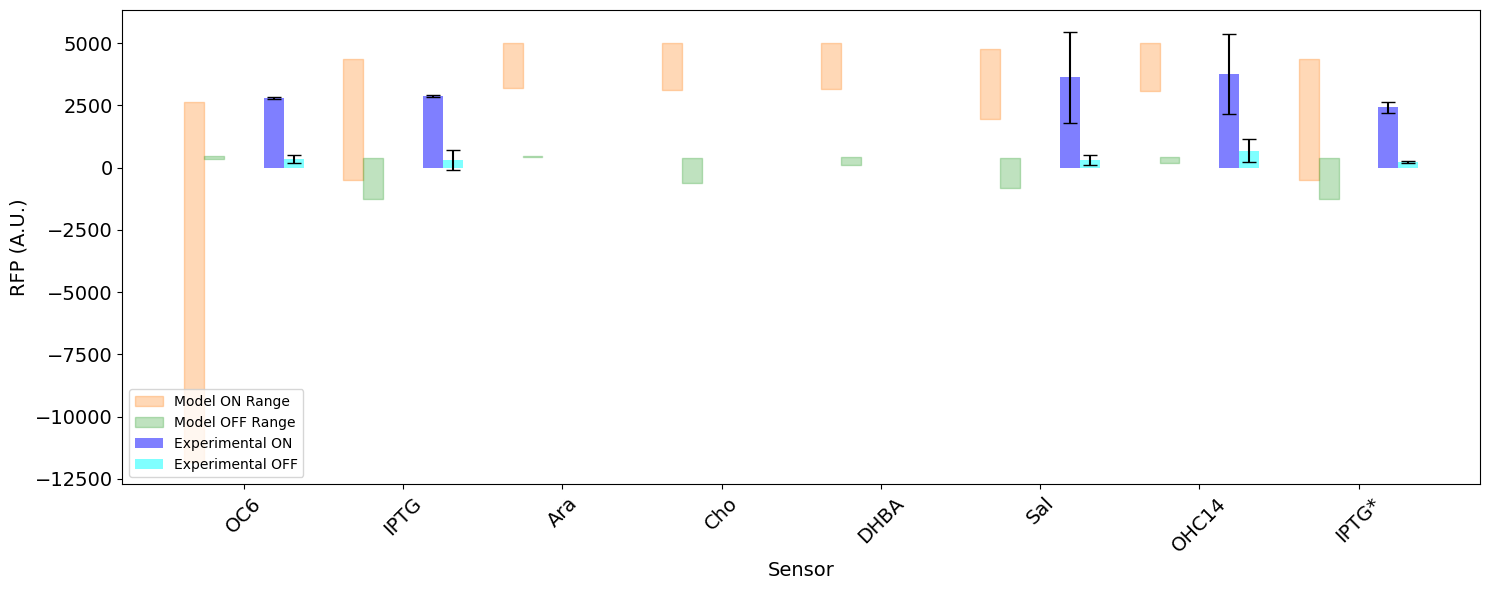

In [18]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(15,6))

bar_width = 0.05  
bar_spacing = 0.1  

sensor_labels = []
sensor_ticks = []

for i, key in enumerate(fold_change.keys()):
    model_on_pos = i * (bar_width * 2 + bar_spacing * 3)  
    model_off_pos = model_on_pos + bar_width  
    exp_on_pos = model_off_pos + bar_width + bar_spacing  
    exp_off_pos = exp_on_pos + bar_width  
    
    sensor_labels.append(key)
    sensor_ticks.append((model_on_pos + exp_off_pos) / 2)  
    
    # Model range as shaded area
    ax.fill_between([model_on_pos - bar_width/2, model_on_pos + bar_width/2], 
                    min_on_values[key], max_on_values[key], color="C1", alpha=0.3, 
                    label="Model ON Range" if i == 0 else "")
    ax.fill_between([model_off_pos - bar_width/2, model_off_pos + bar_width/2], 
                    min_off_values[key], max_off_values[key], color="C2", alpha=0.3, 
                    label="Model OFF Range" if i == 0 else "")
    
    # Experimental bars with error bars
    if key in exp_on_values and key in exp_off_values:  # Ensure we have the data
        exp_on_err = all_absolute_data[key].loc["std"][0]  # Replace with appropriate error value
        exp_off_err = all_absolute_data[key].loc["std"][-1]  # Replace with appropriate error value
        ax.bar(exp_on_pos, exp_on_values[key], bar_width, color="blue", alpha=0.5, 
               yerr=exp_on_err, capsize=5, label="Experimental ON" if i == 0 else "")
        ax.bar(exp_off_pos, exp_off_values[key], bar_width, color="cyan", alpha=0.5, 
               yerr=exp_off_err, capsize=5, label="Experimental OFF" if i == 0 else "")
    

ax.set_xlabel("Sensor", fontsize=14)
ax.set_xticks(sensor_ticks)
ax.set_xticklabels(sensor_labels, rotation=45, fontsize=14)
ax.set_ylabel("RFP (A.U.)", fontsize=14)
plt.legend()
# Limit y-axis to 0 to 6000
# plt.ylim(0, 6000)
plt.yticks(fontsize=14)
plt.tight_layout()  
plt.savefig("prediction_expression_absolutes.svg")
plt.show()


In [15]:
max_on_values

{'OC6': 2647.273998317037,
 'IPTG': 4352.989121259564,
 'Ara': 5020.026305064108,
 'Cho': 4999.619391544763,
 'DHBA': 5014.353557716459,
 'Sal': 4776.755723676405,
 'OHC14': 5006.242579333908}